In [1]:
### Import packages ###
import time
import numpy as np
import math as math
import pandas as pd
import random as random

### Append Path ###
import sys
sys.path.append('..')

### Import functions ###
from utils.Main import *
from utils.Selector import *
from utils.Auxiliary import *
from utils.Prediction import *

# Inputs

In [2]:
data_list = ['concrete_cs',
'concrete_flow',
'concrete_slump',
'yacht',
'housing',
'mpg',
'concrete',
'wine_red',
'wine_white',
'cps',
'no2',
'pm10']

In [3]:
### Get Directory ###
cwd = os.getcwd()
ParentDirectory = os.path.abspath(os.path.join(cwd, "..",".."))

### DataType ###
DataFileInput = "no2"
NSim = 50

# Simulation

In [4]:
all_results = RunSimulationFunction(DataFileInput = DataFileInput,
                                    NSim = NSim,
                                    machine_learning_model = 'LinearRegressionPredictor',
                                    test_proportion = 0.2,
                                    candidate_proportion = 0.8)


--- Running Simulations for: iGS ---


Simulations: 100%|██████████| 50/50 [00:10<00:00,  5.00it/s]



--- Running Simulations for: WiGS (Static w_x=0.25) ---


Simulations: 100%|██████████| 50/50 [00:09<00:00,  5.20it/s]



--- Running Simulations for: WiGS (Static w_x=0.5) ---


Simulations: 100%|██████████| 50/50 [00:09<00:00,  5.20it/s]



--- Running Simulations for: WiGS (Static w_x=0.75) ---


Simulations: 100%|██████████| 50/50 [00:09<00:00,  5.20it/s]



--- Running Simulations for: WiGS (Time-Decay, Linear) ---


Simulations: 100%|██████████| 50/50 [00:09<00:00,  5.21it/s]



--- Running Simulations for: WiGS (Time-Decay, Exponential) ---


Simulations: 100%|██████████| 50/50 [00:09<00:00,  5.21it/s]



--- Running Simulations for: WiGS (MAB-UCB1, c=0.5) ---


Simulations: 100%|██████████| 50/50 [00:09<00:00,  5.17it/s]



--- Running Simulations for: WiGS (MAB-UCB1, c=2.0) ---


Simulations: 100%|██████████| 50/50 [00:09<00:00,  5.19it/s]



--- Running Simulations for: WiGS (MAB-UCB1, c=5.0) ---


Simulations: 100%|██████████| 50/50 [00:09<00:00,  5.19it/s]


# Simulation Results

## Graph Parameters

In [5]:
### Labels ###
Y_Label = "RMSE"
PlotSubtitle = "Active Learning Performance Comparison on MPG Dataset"


### Colors ###
colors = {
    # Original methods
    'Passive Learning': 'gray',
    'GSx': 'cornflowerblue',
    'GSy': 'salmon',
    'iGS': 'red',

    # WiGS Static methods
    'WiGS (Static w_x=0.75)': 'lightgreen',
    'WiGS (Static w_x=0.5)': 'forestgreen',
    'WiGS (Static w_x=0.25)': 'darkgreen',

    # WiGS Time-Decay methods
    'WiGS (Time-Decay, Linear)': 'orange',
    'WiGS (Time-Decay, Exponential)': 'saddlebrown',

    # MAB 
    'WiGS (MAB-UCB1, c=0.5)': 'orchid',
    'WiGS (MAB-UCB1, c=2.0)': 'darkviolet',
    'WiGS (MAB-UCB1, c=5.0)': 'indigo',
}

### Line styles ###
linestyles = {
    'Passive Learning': ':',
    'GSx': ':',
    'GSy': ':',
    'iGS': '-',
    'WiGS (Static w_x=0.75)': '-',
    'WiGS (Static w_x=0.5)': '-.',
    'WiGS (Static w_x=0.25)': '--',
    'WiGS (Time-Decay, Linear)': '-',
    'WiGS (Time-Decay, Exponential)': '-.',
    'WiGS (MAB-UCB1, c=0.5)': '-',
    'WiGS (MAB-UCB1, c=2.0)': '-',
    'WiGS (MAB-UCB1, c=5.0)': '-'}

### Legend ###
LegendMapping = {
    'Passive Learning': 'Random',
    'GSx': 'GSx',
    'GSy': 'GSy',
    'iGS': 'iGS',
    'WiGS (Static w_x=0.75)': 'WiGS (Static, w_x=0.75)',
    'WiGS (Static w_x=0.5)': 'WiGS (Static, w_x=0.5)',
    'WiGS (Static w_x=0.25)': 'WiGS (Static, w_x=0.25)',
    'WiGS (Time-Decay, Linear)': 'WiGS (Linear Decay)',
    'WiGS (Time-Decay, Exponential)': 'WiGS (Exponential Decay)',
    'WiGS (MAB-UCB1, c=0.5)': 'WiGS (MAB-UCB1, c=0.5)',
    'WiGS (MAB-UCB1, c=2.0)': 'WiGS (MAB-UCB1, c=2.0)',
    'WiGS (MAB-UCB1, c=5.0)': 'WiGS (MAB-UCB1, c=5.0)' }

## Graph Inputs

In [6]:
### Plots ###
strategies_to_plot = [
    ## Original Methods ##
    # 'Passive Learning',
    # 'GSx',
    # 'GSy',
    'iGS',

    ## WIGS Methods (Static) ##
    'WiGS (Static w_x=0.75)',  # Favors exploration (GSx)
    # 'WiGS (Static w_x=0.5)',   # Balanced approach
    # 'WiGS (Static w_x=0.25)',  # Favors exploitation (GSy)

    ## WiGS Methods (Time-decayed) ##
    'WiGS (Time-Decay, Linear)',
    'WiGS (Time-Decay, Exponential)',
    
    ## WiGS Methods (MAB) ##
    'WiGS (MAB-UCB1, c=0.5)',
    'WiGS (MAB-UCB1, c=2.0)',
    'WiGS (MAB-UCB1, c=5.0)'
]

filtered_results_to_plot = {key: all_results[key] for key in strategies_to_plot if key in all_results}

## Plot

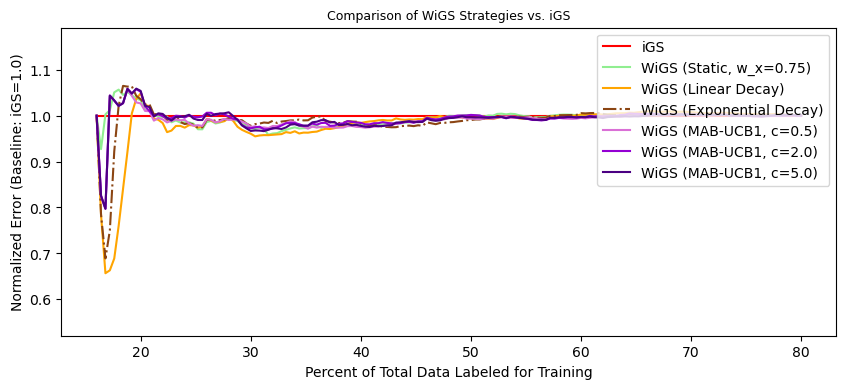

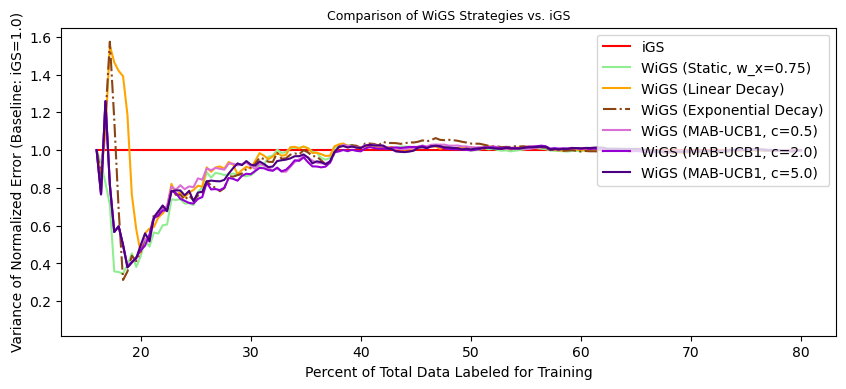

In [9]:
TracePlotMean, TracePlotVariance = MeanVariancePlot(
    RelativeError="iGS",
    Colors=colors,
    LegendMapping=LegendMapping,
    Linestyles=linestyles,
    Y_Label=Y_Label,
    Subtitle="Comparison of WiGS Strategies vs. iGS", 
    TransparencyVal=0.00,
    VarInput=True,
    CriticalValue=1.96,
    initial_train_proportion=0.16,
    candidate_pool_proportion=0.64,
    **filtered_results_to_plot 
)


## Save

In [8]:
# ### Save Simulations ###
# file_path = os.path.join("/Users/simondn/Documents/WeightedGreedySampling/Results/simulation_results", f"{DataFileInput}_results.pkl")
# with open(file_path, 'wb') as file:
#     pickle.dump(all_results, file)
    
# ### Save Trace Plot ###
# trace_plot_path = os.path.join("/Users/simondn/Documents/WeightedGreedySampling/Results/images/trace", f"{DataFileInput}_TracePlot.png")
# TracePlotMean.savefig(trace_plot_path, bbox_inches='tight', dpi=300)

# ### Save Variance Plot ###
# variance_plot_path = os.path.join("/Users/simondn/Documents/WeightedGreedySampling/Results/images/variance", f"{DataFileInput}_VariancePlot.png")
# TracePlotVariance.savefig(variance_plot_path, bbox_inches='tight', dpi=300)